# Multiplication

In [1]:
from qualtran import Bloq, CompositeBloq, BloqBuilder, Signature, Register
from qualtran import QBit, QInt, QUInt, QAny
from qualtran.drawing import show_bloq, show_call_graph, show_counts_sigma
from typing import *
import numpy as np
import sympy
import cirq

## `PlusEqualProduct`
Performs result += a * b.

#### Parameters
 - `a_bitsize`: bitsize of input `a`.
 - `b_bitsize`: bitsize of input `b`.
 - `result_bitsize`: bitsize of the output register.
 - `is_adjoint`: If true, performs `result -= a * b` instead. Defaults to False. 

#### Registers
 - `a`: QUInt of `a_bitsize` bits.
 - `b`: QUInt of `b_bitsize` bits.
 - `result`: QUInt of `result_bitsize` bits.


In [2]:
from qualtran.bloqs.arithmetic import PlusEqualProduct

### Example Instances

In [3]:
a_bit, b_bit, res_bit = 2, 2, 4
plus_equal_product = PlusEqualProduct(a_bit, b_bit, res_bit)

#### Graphical Signature

### Call Graph

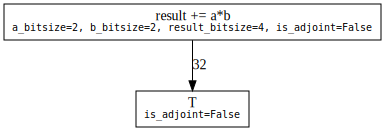

#### Counts totals:
 - `T`: 32

In [4]:
from qualtran.resource_counting.generalizers import ignore_split_join
plus_equal_product_g, plus_equal_product_sigma = plus_equal_product.call_graph(max_depth=1, generalizer=ignore_split_join)
show_call_graph(plus_equal_product_g)
show_counts_sigma(plus_equal_product_sigma)

## `Product`
Compute the product of an `n` and `m` bit binary number.

Implements $U|a\rangle|b\rangle|0\rangle \rightarrow
|a\rangle|b\rangle|a\times b\rangle$ using $2nm-n$ Toffolis.

#### Parameters
 - `a_bitsize`: Number of bits used to represent the first integer.
 - `b_bitsize`: Number of bits used to represent the second integer. 

#### Registers
 - `a`: a_bitsize-sized input register.
 - `b`: b_bitsize-sized input register.
 - `result`: A 2*`max(a_bitsize, b_bitsize)` bit-sized output register to store the result a*b. 

#### References
 - [Fault-Tolerant Quantum Simulations of Chemistry in First Quantization](https://arxiv.org/abs/2105.12767). pg 81 gives a Toffoli complexity for multiplying two numbers.


In [5]:
from qualtran.bloqs.arithmetic import Product

### Example Instances

In [6]:
product = Product(a_bitsize=4, b_bitsize=6)

#### Graphical Signature

In [7]:
from qualtran.drawing import show_bloqs
show_bloqs([product],
           ['`product`'])

### Call Graph

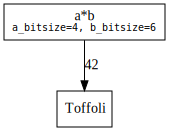

#### Counts totals:
 - `Toffoli`: 42

In [8]:
from qualtran.resource_counting.generalizers import ignore_split_join
product_g, product_sigma = product.call_graph(max_depth=1, generalizer=ignore_split_join)
show_call_graph(product_g)
show_counts_sigma(product_sigma)

## `Square`
Square an n-bit binary number.

Implements $U|a\rangle|0\rangle \rightarrow |a\rangle|a^2\rangle$ using $n^2 - n$ Toffolis.

#### Parameters
 - `bitsize`: Number of bits used to represent the integer to be squared. The result is stored in a register of size 2*bitsize. 

#### Registers
 - `a`: A bitsize-sized input register (register a above).
 - `result`: A 2-bitsize-sized input/output register. 

#### References
 - [Fault-Tolerant Quantum Simulations of Chemistry in First Quantization](https://arxiv.org/abs/2105.12767). pg 76 for Toffoli complexity.


In [9]:
from qualtran.bloqs.arithmetic import Square

### Example Instances

In [10]:
square = Square(bitsize=8)

#### Graphical Signature

In [11]:
from qualtran.drawing import show_bloqs
show_bloqs([square],
           ['`square`'])

### Call Graph

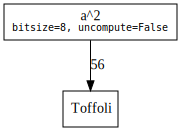

#### Counts totals:
 - `Toffoli`: 56

In [12]:
from qualtran.resource_counting.generalizers import ignore_split_join
square_g, square_sigma = square.call_graph(max_depth=1, generalizer=ignore_split_join)
show_call_graph(square_g)
show_counts_sigma(square_sigma)

## `SumOfSquares`
Compute the sum of squares of k n-bit binary numbers.

Implements $U|a\rangle|b\rangle\dots k\rangle|0\rangle \rightarrow
    |a\rangle|b\rangle\dots|k\rangle|a^2+b^2+\dots k^2\rangle$ using
    $4 k n^2 T$ gates.

The number of bits required by the output register is 2*bitsize + ceil(log2(k)).

#### Parameters
 - `bitsize`: Number of bits used to represent each of the k integers.
 - `k`: The number of integers we want to square. 

#### Registers
 - `input`: k n-bit registers.
 - `result`: 2 * bitsize + ceil(log2(k)) sized output register. 

#### References
 - [Fault-Tolerant Quantum Simulations of Chemistry in First Quantization](https://arxiv.org/abs/2105.12767). pg 80 gives a Toffoli complexity for squaring.


In [13]:
from qualtran.bloqs.arithmetic import SumOfSquares

### Example Instances

In [14]:
sum_of_squares = SumOfSquares(bitsize=8, k=4)

#### Graphical Signature

In [15]:
from qualtran.drawing import show_bloqs
show_bloqs([sum_of_squares],
           ['`sum_of_squares`'])

### Call Graph

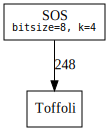

#### Counts totals:
 - `Toffoli`: 248

In [16]:
from qualtran.resource_counting.generalizers import ignore_split_join
sum_of_squares_g, sum_of_squares_sigma = sum_of_squares.call_graph(max_depth=1, generalizer=ignore_split_join)
show_call_graph(sum_of_squares_g)
show_counts_sigma(sum_of_squares_sigma)

## `ScaleIntByReal`
Scale an integer by fixed-point representation of a real number.

i.e.

$$
    |r\rangle|i\rangle|0\rangle \rightarrow |r\rangle|i\rangle|r \times i\rangle
$$

The real number is assumed to be in the range [0, 1).

#### Parameters
 - `r_bitsize`: Number of bits used to represent the real number.
 - `i_bitsize`: Number of bits used to represent the integer. 

#### Registers
 - `real_in`: r_bitsize-sized input fixed-point register.
 - `int_in`: i_bitsize-sized input register.
 - `result`: a r_bitsize sized output fixed-point register. 

#### References
 - [Compilation of Fault-Tolerant Quantum Heuristics for Combinatorial Optimization](     https://arxiv.org/pdf/2007.07391.pdf) pg 70.


In [17]:
from qualtran.bloqs.arithmetic import ScaleIntByReal

### Example Instances

In [18]:
scale_int_by_real = ScaleIntByReal(r_bitsize=12, i_bitsize=4)

#### Graphical Signature

In [19]:
from qualtran.drawing import show_bloqs
show_bloqs([scale_int_by_real],
           ['`scale_int_by_real`'])

### Call Graph

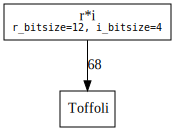

#### Counts totals:
 - `Toffoli`: 68

In [20]:
from qualtran.resource_counting.generalizers import ignore_split_join
scale_int_by_real_g, scale_int_by_real_sigma = scale_int_by_real.call_graph(max_depth=1, generalizer=ignore_split_join)
show_call_graph(scale_int_by_real_g)
show_counts_sigma(scale_int_by_real_sigma)

## `MultiplyTwoReals`
Multiply two fixed-point representations of real numbers

i.e.

$$
    |a\rangle|b\rangle|0\rangle \rightarrow |a\rangle|b\rangle|a \times b\rangle
$$

The real numbers are assumed to be in the range [0, 1).

#### Parameters
 - `bitsize`: Number of bits used to represent the real number. 

#### Registers
 - `a`: bitsize-sized input register.
 - `b`: bitsize-sized input register.
 - `result`: bitsize output register 

#### References
 - [Compilation of Fault-Tolerant Quantum Heuristics for Combinatorial Optimization](https://arxiv.org/abs/2007.07391). Appendix D. Section 5. (p. 71).


In [21]:
from qualtran.bloqs.arithmetic import MultiplyTwoReals

### Example Instances

In [22]:
multiply_two_reals = MultiplyTwoReals(bitsize=10)

#### Graphical Signature

In [23]:
from qualtran.drawing import show_bloqs
show_bloqs([multiply_two_reals],
           ['`multiply_two_reals`'])

### Call Graph

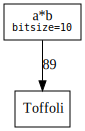

#### Counts totals:
 - `Toffoli`: 89

In [24]:
from qualtran.resource_counting.generalizers import ignore_split_join
multiply_two_reals_g, multiply_two_reals_sigma = multiply_two_reals.call_graph(max_depth=1, generalizer=ignore_split_join)
show_call_graph(multiply_two_reals_g)
show_counts_sigma(multiply_two_reals_sigma)

## `SquareRealNumber`
Square a fixed-point representation of a real number

i.e.

$$
    |a\rangle|0\rangle \rightarrow |a\rangle|a^2\rangle
$$

The real numbers are assumed to be in the range [0, 1).

#### Parameters
 - `bitsize`: Number of bits used to represent the real number. 

#### Registers
 - `a`: bitsize-sized input register.
 - `b`: bitsize-sized input register.
 - `result`: bitsize output register 

#### References
 - [Compilation of Fault-Tolerant Quantum Heuristics for Combinatorial Optimization](https://arxiv.org/abs/2007.07391). Appendix D. Section 6. (p. 74).


In [25]:
from qualtran.bloqs.arithmetic import SquareRealNumber

### Example Instances

In [26]:
square_real_number = SquareRealNumber(bitsize=10)

#### Graphical Signature

In [27]:
from qualtran.drawing import show_bloqs
show_bloqs([square_real_number],
           ['`square_real_number`'])

### Call Graph

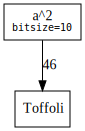

#### Counts totals:
 - `Toffoli`: 46

In [28]:
from qualtran.resource_counting.generalizers import ignore_split_join
square_real_number_g, square_real_number_sigma = square_real_number.call_graph(max_depth=1, generalizer=ignore_split_join)
show_call_graph(square_real_number_g)
show_counts_sigma(square_real_number_sigma)

In [29]:
from qualtran.drawing import show_bloqs
show_bloqs([plus_equal_product],
           ['`plus_equal_product`'])

## `InvertRealNumber`
Invert a fixed-point representation of a real number.

Implements the unitary:
$$
    |a\rangle|0\rangle \rightarrow |a\rangle|1/a\rangle
$$
where $a \ge 1$.

#### Parameters
 - `bitsize`: Number of bits used to represent the number.
 - `num_frac`: Number of fraction bits in the number. 

#### Registers
 - `a`: `bitsize`-sized input register.
 - `result`: `bitsize`-sized output register. 
 - `References`: 
 - `[Quantum Algorithms and Circuits for Scientific Computing](https`: //arxiv.org/pdf/1511.08253). Section 2.1.


In [30]:
from qualtran.bloqs.arithmetic import InvertRealNumber

### Example Instances

In [31]:
invert_real_number = InvertRealNumber(bitsize=10, num_frac=7)

#### Graphical Signature

In [32]:
from qualtran.drawing import show_bloqs
show_bloqs([invert_real_number],
           ['`invert_real_number`'])

### Call Graph

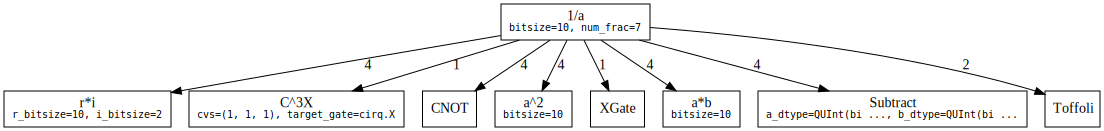

#### Counts totals:
 - `CNOT`: 4
 - `MultiControlX`: 1
 - `MultiplyTwoReals`: 4
 - `ScaleIntByReal`: 4
 - `SquareRealNumber`: 4
 - `Subtract`: 4
 - `Toffoli`: 2
 - `XGate`: 1

In [33]:
from qualtran.resource_counting.generalizers import ignore_split_join
invert_real_number_g, invert_real_number_sigma = invert_real_number.call_graph(max_depth=1, generalizer=ignore_split_join)
show_call_graph(invert_real_number_g)
show_counts_sigma(invert_real_number_sigma)